## Basic Z-Test

In [1]:
dataset = [80, 85, 88, 92, 95, 78, 89, 91, 88, 82, 79, 94, 90, 87, 84]


In [2]:
import hashlib

def hash_function(value):
    hash_object = hashlib.md5(str(value).encode())
    return int(hash_object.hexdigest(), 16) % len(dataset)


In [3]:
samples = []
for _ in range(3):
    index = hash_function(_)
    samples.append(dataset[index])

print("Samples:", samples)


Samples: [79, 85, 90]


In [4]:
import statistics

population_mean = statistics.mean(dataset)
population_stddev = statistics.stdev(dataset)

sample_mean = statistics.mean(samples)
z_value = (sample_mean - population_mean) / population_stddev

print("Z Value:", z_value)


Z Value: -0.3989107157369403


In [5]:
best_sample_index = samples.index(max(samples, key=lambda x: abs(x - population_mean)))
print("Best Sample:", samples[best_sample_index])
print("Z Value for Best Sample:", z_value)


Best Sample: 79
Z Value for Best Sample: -0.3989107157369403


## Z-Test (Sampling - College Students CGPA, SGPA)

In [4]:
import csv
import random
import statistics
import matplotlib.pyplot as plt

# Read data from CSV file
def read_data_from_csv(file_path):
    data = []
    with open(file_path, 'r') as csvfile:
        reader = csv.reader(csvfile)
        next(reader)  # Skip the header row
        for row in reader:
            # Assuming CGPA is in the first column and SGPA is in the second column
            cgpa, sgpa = float(row[0]), float(row[1])
            data.append((cgpa, sgpa))
    return data

# Write data to CSV file
def write_data_to_csv(file_path, data):
    with open(file_path, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        for row in data:
            writer.writerow(row)

# Read data from CSV file
dataset = read_data_from_csv('students_data.csv')



In [5]:
def custom_hash(value):

    # A simple hash function based on CGPA
    return int(value[0] * 10) % 3


In [6]:
# Initializing empty sample lists
sample1, sample2, sample3 = [], [], []

# Performing custom sampling
for data_point in dataset:
    hash_value = custom_hash(data_point)
    if hash_value == 0:
        sample1.append(data_point)
    elif hash_value == 1:
        sample2.append(data_point)
    else:
        sample3.append(data_point)


In [7]:
# Calculating means and standard deviations for each sample
mean1 = statistics.mean([x[1] for x in sample1])
std_dev1 = statistics.stdev([x[1] for x in sample1])

mean2 = statistics.mean([x[1] for x in sample2])
std_dev2 = statistics.stdev([x[1] for x in sample2])

mean3 = statistics.mean([x[1] for x in sample3])
std_dev3 = statistics.stdev([x[1] for x in sample3])


Sample 1 is the best sample.
Best Sample: [(3.9, 4.0), (3.6, 3.8)]


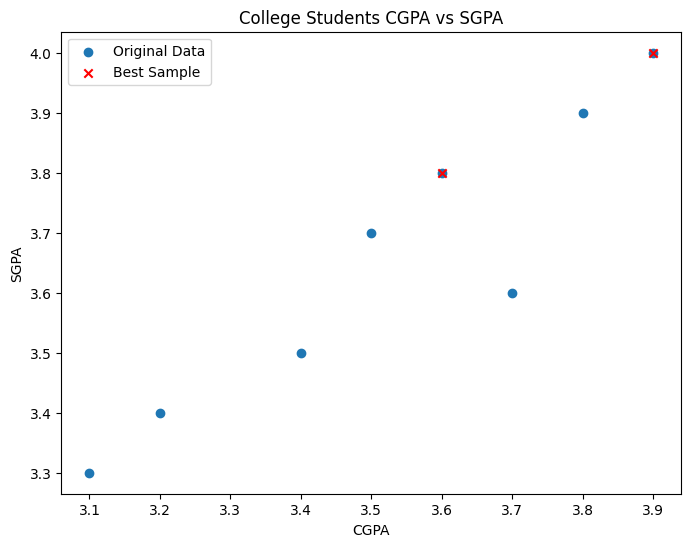

In [8]:
# Calculating Z-values for each sample
z_value1 = (mean1 - statistics.mean([x[1] for x in dataset])) / std_dev1
z_value2 = (mean2 - statistics.mean([x[1] for x in dataset])) / std_dev2
z_value3 = (mean3 - statistics.mean([x[1] for x in dataset])) / std_dev3

# Comparing Z-values and concluding the best sample
best_sample = None
if z_value1 > z_value2 and z_value1 > z_value3:
    best_sample = sample1
    print("Sample 1 is the best sample.")
elif z_value2 > z_value1 and z_value2 > z_value3:
    best_sample = sample2
    print("Sample 2 is the best sample.")
else:
    best_sample = sample3
    print("Sample 3 is the best sample.")

# Printing the best sample
print("Best Sample:", best_sample)

# Plotting the data points and best sample
plt.figure(figsize=(8, 6))
plt.scatter(*zip(*dataset), label='Original Data')
plt.scatter(*zip(*best_sample), label='Best Sample', color='red', marker='x')
plt.xlabel('CGPA')
plt.ylabel('SGPA')
plt.legend()
plt.title('College Students CGPA vs SGPA')
plt.show()


In [ ]:
## Z-Test (Sampling - EB Bill)

In [18]:
import csv
import statistics

# Read data from CSV file
def read_data_from_csv(file_path):
    data = []
    with open(file_path, 'r') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            units_consumed, amount = int(row['UnitsConsumed']), int(row['Amount'])
            data.append((units_consumed, amount))
    return data

# Custom hash function for sampling
def custom_hash(value):
    # Hash function based on Units Consumed
    return value[0] % 3

# Read data from CSV file
dataset = read_data_from_csv('eb_bill_data.csv')

# Perform sampling using custom hash function
sample1, sample2, sample3 = [], [], []
for data_point in dataset:
    hash_value = custom_hash(data_point)
    if hash_value == 0:
        sample1.append(data_point)
    elif hash_value == 1:
        sample2.append(data_point)
    else:
        sample3.append(data_point)


In [19]:
# Calculate mean and standard deviation for each sample if they have at least two data points
mean1, std_dev1 = statistics.mean([x[1] for x in sample1]), statistics.stdev([x[1] for x in sample1]) if len(sample1) >= 2 else (float('nan'), float('nan'))
mean2, std_dev2 = statistics.mean([x[1] for x in sample2]), statistics.stdev([x[1] for x in sample2]) if len(sample2) >= 2 else (float('nan'), float('nan'))
mean3, std_dev3 = statistics.mean([x[1] for x in sample3]), statistics.stdev([x[1] for x in sample3]) if len(sample3) >= 2 else (float('nan'), float('nan'))

# Calculate Z-values for each sample
z_value1 = (mean1 - statistics.mean([x[1] for x in dataset])) / std_dev1 if len(sample1) >= 2 else float('nan')
z_value2 = (mean2 - statistics.mean([x[1] for x in dataset])) / std_dev2 if len(sample2) >= 2 else float('nan')
z_value3 = (mean3 - statistics.mean([x[1] for x in dataset])) / std_dev3 if len(sample3) >= 2 else float('nan')


In [20]:
import pandas as pd

# Create a DataFrame to display the calculations
data = {
    'Sample': ['Sample 1', 'Sample 2', 'Sample 3'],
    'Mean': [mean1, mean2, mean3],
    'Standard Deviation': [std_dev1, std_dev2, std_dev3],
    'Z-Value': [z_value1, z_value2, z_value3]
}

result_df = pd.DataFrame(data)
result_df.set_index('Sample', inplace=True)
result_df


,Mean,Standard Deviation,Z-Value
Sample,,,
Sample 1,520.0,56.568542,0.864242
Sample 2,490.0,233.023604,0.081060
Sample 3,432.5,259.919859,-0.148550


Sample 1 is the best sample.
Estimated Bill Amount for Total Units Consumed: 702000


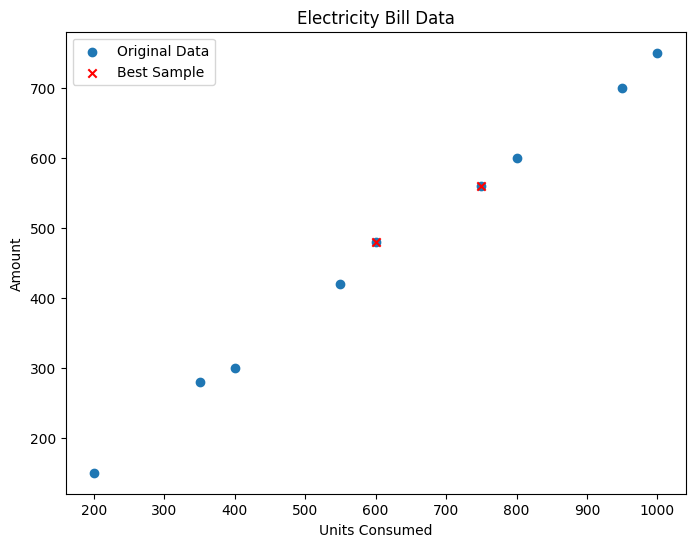

In [23]:
import matplotlib.pyplot as plt

# Determine the best sample
best_sample = None
if z_value1 > z_value2 and z_value1 > z_value3:
    best_sample = sample1
    print("Sample 1 is the best sample.")
elif z_value2 > z_value1 and z_value2 > z_value3:
    best_sample = sample2
    print("Sample 2 is the best sample.")
else:
    best_sample = sample3
    print("Sample 3 is the best sample.")

# Calculate the estimated bill amount for the best sample
total_units_consumed = sum([x[0] for x in best_sample])
estimated_bill_amount = total_units_consumed * (mean1 if len(sample1) >= 2 else float('nan'))

# Print the estimated bill amount
print("Estimated Bill Amount for Total Units Consumed:", estimated_bill_amount)

# Plot the data points and best sample
plt.figure(figsize=(8, 6))
plt.scatter(*zip(*dataset), label='Original Data')
plt.scatter(*zip(*best_sample), label='Best Sample', color='red', marker='x')
plt.xlabel('Units Consumed')
plt.ylabel('Amount')
plt.legend()
plt.title('Electricity Bill Data')
plt.show()

## Z-Test (Sampling - Salary)

,Sample,Mean,Standard Deviation,Z-Value
0,Sample 1,181800.0,89784.822134,-0.006493
1,Sample 2,179562.5,94107.717537,-0.029971
2,Sample 3,185750.0,95207.492702,0.035365


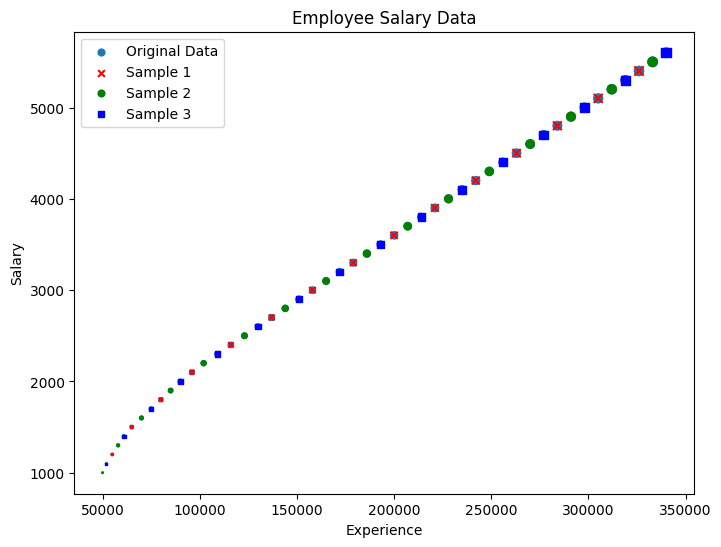

In [30]:
import csv
import statistics
import pandas as pd
import matplotlib.pyplot as plt

# Read data from CSV file
def read_data_from_csv(file_path):
    data = []
    with open(file_path, 'r') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            salary, daa, experience = int(row['Salary']), int(row['DAA']), int(row['Experience'])
            data.append((salary, daa, experience))
    return data

# Custom hash function for sampling
def custom_hash(value):
    return value[2] % 3  # Hash based on Experience

# Read data from CSV file
dataset = read_data_from_csv('employee_data.csv')

# Perform sampling using custom hash function
sample1, sample2, sample3 = [], [], []
for data_point in dataset:
    hash_value = custom_hash(data_point)
    if hash_value == 0:
        sample1.append(data_point)
    elif hash_value == 1:
        sample2.append(data_point)
    else:
        sample3.append(data_point)

# Calculate mean and standard deviation for each sample
mean1, std_dev1 = statistics.mean([x[0] for x in sample1]), statistics.stdev([x[0] for x in sample1]) if len(sample1) >= 2 else (float('nan'), float('nan'))
mean2, std_dev2 = statistics.mean([x[0] for x in sample2]), statistics.stdev([x[0] for x in sample2]) if len(sample2) >= 2 else (float('nan'), float('nan'))
mean3, std_dev3 = statistics.mean([x[0] for x in sample3]), statistics.stdev([x[0] for x in sample3]) if len(sample3) >= 2 else (float('nan'), float('nan'))

# Calculate Z-values for each sample
z_value1 = (mean1 - statistics.mean([x[0] for x in dataset])) / std_dev1 if len(sample1) >= 2 else float('nan')
z_value2 = (mean2 - statistics.mean([x[0] for x in dataset])) / std_dev2 if len(sample2) >= 2 else float('nan')
z_value3 = (mean3 - statistics.mean([x[0] for x in dataset])) / std_dev3 if len(sample3) >= 2 else float('nan')

# Create a DataFrame to display mean, standard deviation, and z-values in a table
data = {
    'Sample': ['Sample 1', 'Sample 2', 'Sample 3'],
    'Mean': [mean1, mean2, mean3],
    'Standard Deviation': [std_dev1, std_dev2, std_dev3],
    'Z-Value': [z_value1, z_value2, z_value3]
}

result_df = pd.DataFrame(data)
display(result_df)

# Plot the data points and samples
plt.figure(figsize=(8, 6))
plt.scatter(*zip(*dataset), label='Original Data')
plt.scatter(*zip(*sample1), label='Sample 1', color='red', marker='x')
plt.scatter(*zip(*sample2), label='Sample 2', color='green', marker='o')
plt.scatter(*zip(*sample3), label='Sample 3', color='blue', marker='s')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.legend()
plt.title('Employee Salary Data')
plt.show()


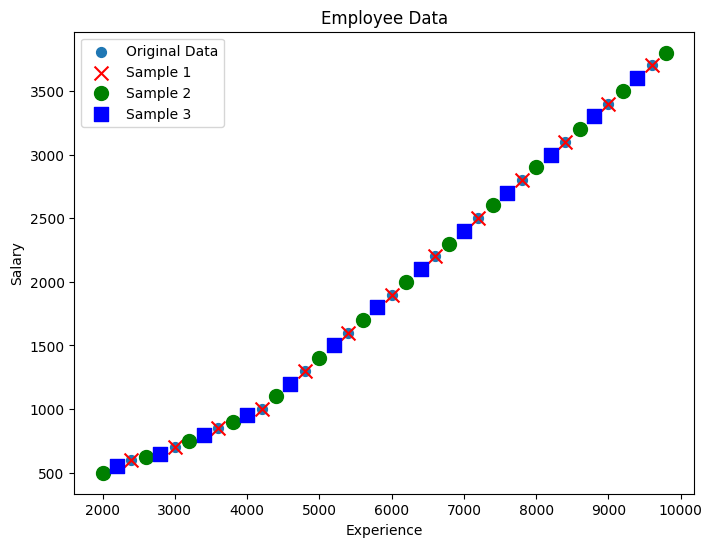

,Sample,Mean Salary,Standard Deviation Salary,Z-Value Salary
0,Sample 1,181800.0,89784.822134,-0.006493
1,Sample 2,179562.5,94107.717537,-0.029971
2,Sample 3,185750.0,95207.492702,0.035365


In [37]:
import csv
import statistics
import pandas as pd
import matplotlib.pyplot as plt

# Read data from CSV file
def read_data_from_csv(file_path):
    data = []
    with open(file_path, 'r') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            salary, daa, experience, hra, pf = int(row['Salary']), int(row['DAA']), int(row['Experience']), int(row['HRA']), int(row['PF'])
            data.append((salary, daa, experience, hra, pf))
    return data

# Custom hash function for sampling
def custom_hash(value):
    return value[2] % 3  # Hash based on Experience

# Read data from CSV file
dataset = read_data_from_csv('employee_data.csv')

# Perform sampling using custom hash function
sample1, sample2, sample3 = [], [], []
for data_point in dataset:
    hash_value = custom_hash(data_point)
    if hash_value == 0:
        sample1.append(data_point)
    elif hash_value == 1:
        sample2.append(data_point)
    else:
        sample3.append(data_point)

# Calculate mean and standard deviation for each sample (including HRA and PF)
mean_hra1, std_dev_hra1 = statistics.mean([x[3] for x in sample1]), statistics.stdev([x[3] for x in sample1]) if len(sample1) >= 2 else (float('nan'), float('nan'))
mean_hra2, std_dev_hra2 = statistics.mean([x[3] for x in sample2]), statistics.stdev([x[3] for x in sample2]) if len(sample2) >= 2 else (float('nan'), float('nan'))
mean_hra3, std_dev_hra3 = statistics.mean([x[3] for x in sample3]), statistics.stdev([x[3] for x in sample3]) if len(sample3) >= 2 else (float('nan'), float('nan'))

mean_pf1, std_dev_pf1 = statistics.mean([x[4] for x in sample1]), statistics.stdev([x[4] for x in sample1]) if len(sample1) >= 2 else (float('nan'), float('nan'))
mean_pf2, std_dev_pf2 = statistics.mean([x[4] for x in sample2]), statistics.stdev([x[4] for x in sample2]) if len(sample2) >= 2 else (float('nan'), float('nan'))
mean_pf3, std_dev_pf3 = statistics.mean([x[4] for x in sample3]), statistics.stdev([x[4] for x in sample3]) if len(sample3) >= 2 else (float('nan'), float('nan'))

# Create a DataFrame to display mean, standard deviation, and z-values in a table
data = {
    'Sample': ['Sample 1', 'Sample 2', 'Sample 3'],
    'Mean Salary': [mean1, mean2, mean3],
    'Mean HRA': [mean_hra1, mean_hra2, mean_hra3],
    'Mean PF': [mean_pf1, mean_pf2, mean_pf3],
    'Standard Deviation Salary': [std_dev1, std_dev2, std_dev3],
    'Standard Deviation HRA': [std_dev_hra1, std_dev_hra2, std_dev_hra3],
    'Standard Deviation PF': [std_dev_pf1, std_dev_pf2, std_dev_pf3],
    'Z-Value Salary': [z_value1, z_value2, z_value3]
}

# Unzip the dataset for scatter plotting
experience, salary, daa, hra, pf = zip(*dataset)
sample1_experience, sample1_salary, sample1_daa, sample1_hra, sample1_pf = zip(*sample1)
sample2_experience, sample2_salary, sample2_daa, sample2_hra, sample2_pf = zip(*sample2)
sample3_experience, sample3_salary, sample3_daa, sample3_hra, sample3_pf = zip(*sample3)

# Plot the data points and samples with distinct markers for each sample
plt.figure(figsize=(8, 6))
plt.scatter(experience, salary, label='Original Data', marker='o', s=50)
plt.scatter(sample1_experience, sample1_salary, color='red', label='Sample 1', marker='x', s=100)
plt.scatter(sample2_experience, sample2_salary, color='green', label='Sample 2', marker='o', s=100)
plt.scatter(sample3_experience, sample3_salary, color='blue', label='Sample 3', marker='s', s=100)
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.legend()
plt.title('Employee Data')
plt.show()

# Display the mean, standard deviation, and z-values in a table
result_df = pd.DataFrame({
    'Sample': ['Sample 1', 'Sample 2', 'Sample 3'],
    'Mean Salary': [mean1, mean2, mean3],
    'Standard Deviation Salary': [std_dev1, std_dev2, std_dev3],
    'Z-Value Salary': [z_value1, z_value2, z_value3]
})

display(result_df)
